### Hypothesis

1. Investigate the relationship between number of steps and screen times (perhaps can analyse screen time cateogries with number of steps too)
2. Impact of notifications on screen time and number of pickups
3. Correlation heatmap with screen times
4. Identify Weekly Usage Trend
5. Screen Time Distribution

### Load the dataset

In [26]:
import pandas as pd

df = pd.read_csv("data.csv")
df

,day,num_steps,average_audio_levels,phone_screentime,entertainment,social,productivity,num_pickups,notifications,mac_screentime
0,Monday,10407,61.0,5.58,1.20,1.00,2.03,121,121,4.25
1,Tuesday,5933,72.0,5.06,2.60,1.00,0.62,163,84,8.87
2,Wednesday,3954,63.5,5.38,2.58,1.05,0.97,107,150,10.02
3,Thursday,9514,42.5,5.35,2.32,1.75,0.35,158,359,10.30
4,Friday,3105,69.0,4.98,2.95,1.22,0.30,158,89,8.78
5,Saturday,258,0.0,6.75,3.53,2.73,0.17,136,128,10.87
6,Sunday,11150,43.5,4.80,2.57,1.98,0.25,133,86,5.03


In [40]:
df.describe()

,num_steps,average_audio_levels,phone_screentime,entertainment,social,productivity,num_pickups,notifications,mac_screentime
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,6331.571429,50.214286,5.414286,2.535714,1.532857,0.670000,139.428571,145.285714,8.302857
std,4144.573997,24.988092,0.646577,0.706891,0.655635,0.659267,21.172759,97.487972,2.620876
min,258.000000,0.000000,4.800000,1.200000,1.000000,0.170000,107.000000,84.000000,4.250000
25%,3529.500000,43.000000,5.020000,2.445000,1.025000,0.275000,127.000000,87.500000,6.905000
50%,5933.000000,61.000000,5.350000,2.580000,1.220000,0.350000,136.000000,121.000000,8.870000
75%,9960.500000,66.250000,5.480000,2.775000,1.865000,0.795000,158.000000,139.000000,10.160000
max,11150.000000,72.000000,6.750000,3.530000,2.730000,2.030000,163.000000,359.000000,10.870000


#### Relationship between number of steps and screen time

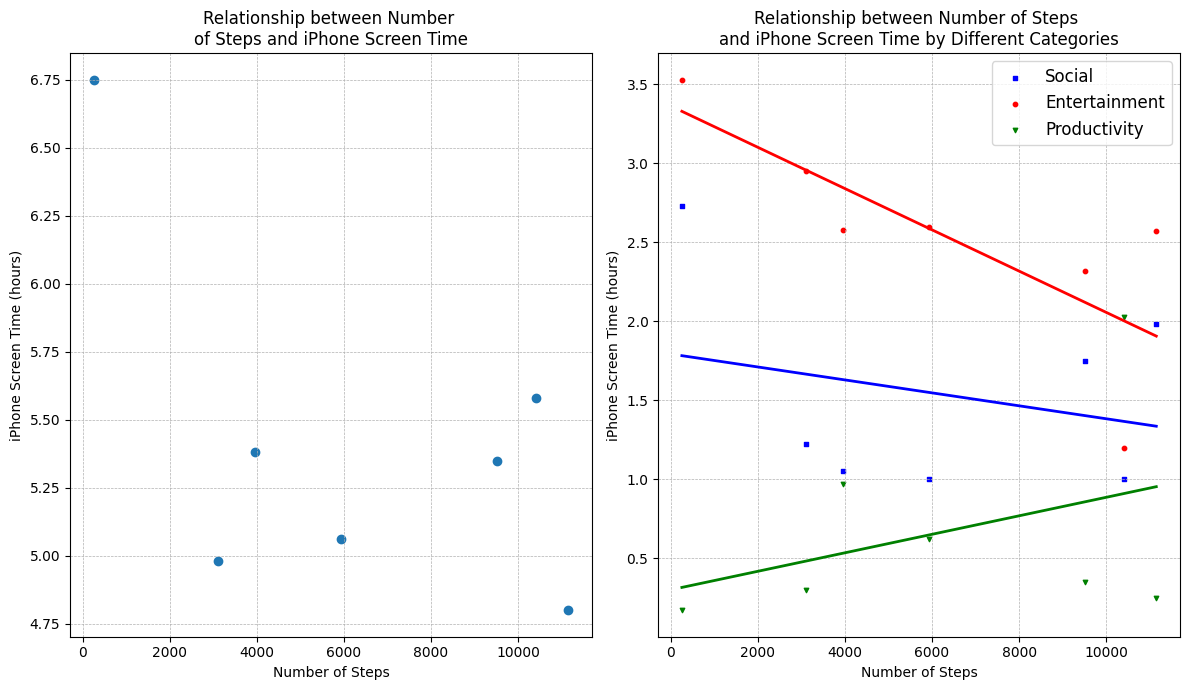

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Sort dataframe values
data = df.copy()
data.sort_values(by='num_steps', inplace=True)

# Add figure for plotting
plt.figure(figsize=(12, 7))

# Plot the first plot 
plt.subplot(1, 2, 1)
plt.scatter(x='num_steps', y='phone_screentime', data=df)
plt.xlabel("Number of Steps")
plt.ylabel("iPhone Screen Time (hours)")
plt.title("Relationship between Number \nof Steps and iPhone Screen Time", fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Plot the second plot
plt.subplot(1, 2, 2)

# Add scatter plots
plt.scatter(df['num_steps'], df['social'], s=10, c='b', marker='s', label='Social')
plt.scatter(df['num_steps'], df['entertainment'], s=10, c='r', marker='o', label='Entertainment')
plt.scatter(df['num_steps'], df['productivity'], s=10, c='g', marker='v', label='Productivity')
plt.legend(loc='upper right', fontsize=12)

# Fit polynomial line
x = df['num_steps'].to_numpy()
y1 = df['social'].to_numpy()
y2 = df['entertainment'].to_numpy()
y3 = df['productivity'].to_numpy()

b, a = np.polyfit(x, y1, 1)
b1, a1 = np.polyfit(x, y2, 1)
b2, a2 = np.polyfit(x, y3, 1)

# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(min(x), max(x), num=100)

# Plot regression line
plt.plot(xseq, a + b * xseq, c='b', linewidth=2)
plt.plot(xseq, a1 + b1 * xseq, c='r', linewidth=2)
plt.plot(xseq, a2 + b2 * xseq, c='g', linewidth=2)

# Touch up
plt.xlabel("Number of Steps")
plt.ylabel("iPhone Screen Time (hours)")
plt.title("Relationship between Number of Steps \nand iPhone Screen Time by Different Categories", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Looked like a negative correlation between number of steps and iphone screen time to me !

Let's break this down, what about the relationship between the number of steps with screen time but break down by different categories (social, entertainment & productivity)?

### Impact of notifications on screen time and number of pickups

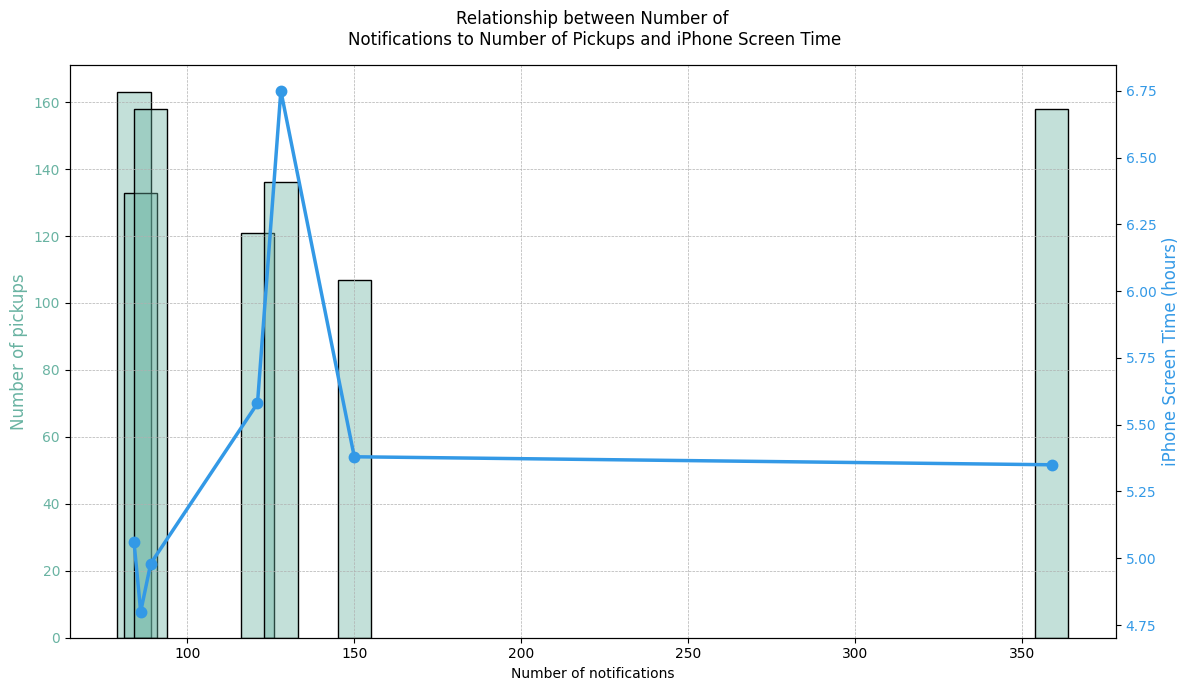

In [76]:
# Plot a line plot with dual y-axis (x: number of notifications)
from matplotlib import colors

# Sort notifications value
df_notifications = df.copy()
df_notifications.sort_values(by='notifications', inplace=True)

# Convert color to RGBA
# Set opacity level too
COLOR_TEMPERATURE = "#69b3a2"
COLOR_PRICE = "#3399e6"
color = list(colors.to_rgba(COLOR_TEMPERATURE))
color[3] = 0.4


# Initialize figure
fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()

# Bar, line plot and scatter plot
ax1.bar(df_notifications['notifications'], df_notifications['num_pickups'], color=color, edgecolor='black', width=10.0)
ax2.plot(df_notifications['notifications'], df_notifications['phone_screentime'], color=COLOR_PRICE, lw=2.5)
ax2.scatter(df_notifications['notifications'], df_notifications['phone_screentime'], color=COLOR_PRICE, lw=2.5)

# Format labels
ax1.set_xlabel("Number of notifications")
ax1.set_ylabel("Number of pickups", color=COLOR_TEMPERATURE, fontsize=12)
ax1.tick_params(axis='y', labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("iPhone Screen Time (hours)", color=COLOR_PRICE, fontsize=12)
ax2.tick_params(axis='y', labelcolor=COLOR_PRICE)

fig.suptitle("Relationship between Number of \nNotifications to Number of Pickups and iPhone Screen Time")

# Gridlines
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### Correlation heatmap between iPhone/Mac screen time and other variables

In [77]:
data

,day,num_steps,average_audio_levels,phone_screentime,entertainment,social,productivity,num_pickups,notifications,mac_screentime
5,Saturday,258,0.0,6.75,3.53,2.73,0.17,136,128,10.87
4,Friday,3105,69.0,4.98,2.95,1.22,0.30,158,89,8.78
2,Wednesday,3954,63.5,5.38,2.58,1.05,0.97,107,150,10.02
1,Tuesday,5933,72.0,5.06,2.60,1.00,0.62,163,84,8.87
3,Thursday,9514,42.5,5.35,2.32,1.75,0.35,158,359,10.30
0,Monday,10407,61.0,5.58,1.20,1.00,2.03,121,121,4.25
6,Sunday,11150,43.5,4.80,2.57,1.98,0.25,133,86,5.03


/var/folders/z1/7rqsn2ms1qdgg5wz1d2g6wv00000gn/T/ipykernel_20680/2407809925.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap1 = sns.heatmap(data.corr()[['phone_screentime']].sort_values(by='phone_screentime', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
/var/folders/z1/7rqsn2ms1qdgg5wz1d2g6wv00000gn/T/ipykernel_20680/2407809925.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap2 = sns.heatmap(data.corr()[['mac_screentime']].sort_values(by='mac_screentime', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


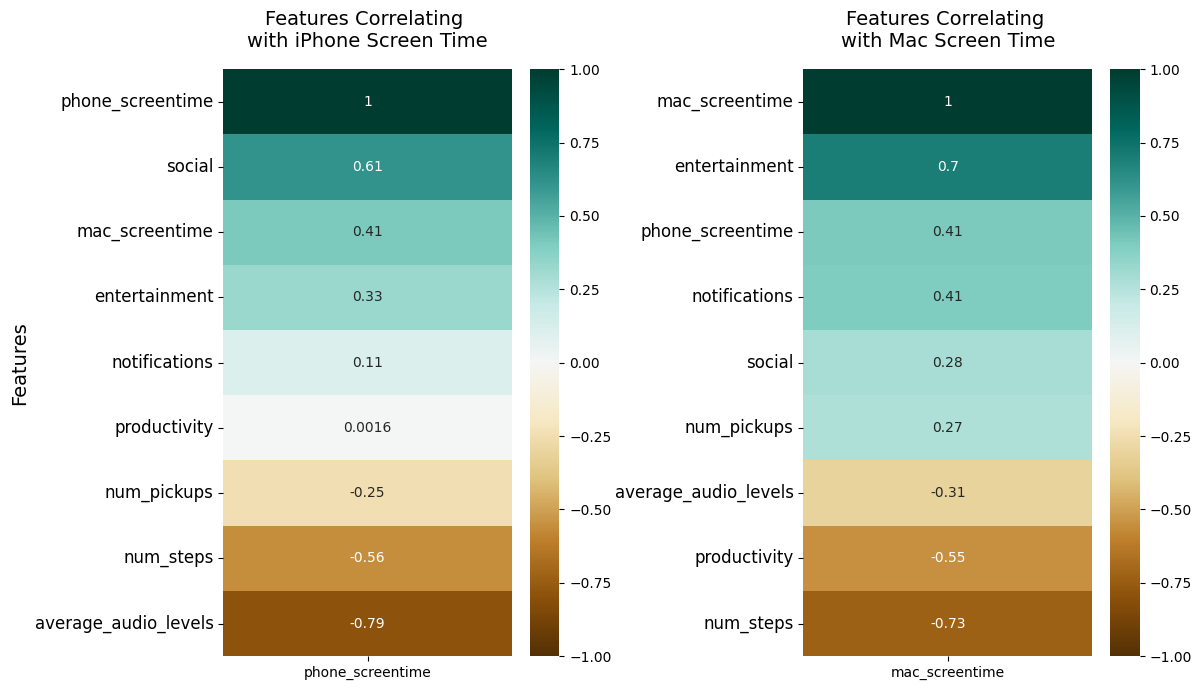

In [89]:
# What are the variables that could correlate the most with my iPhone/Mac screen time?
import seaborn as sns
plt.figure(figsize=(12, 7))

# correlation with phone screentime
plt.subplot(1, 2, 1)
heatmap1 = sns.heatmap(data.corr()[['phone_screentime']].sort_values(by='phone_screentime', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap1.set_title("Features Correlating \nwith iPhone Screen Time", fontdict={'fontsize': 14}, pad=16)
heatmap1.set_ylabel("Features", fontsize=14)
heatmap1.tick_params(axis='y', labelsize=12)

# correlation with mac screentime
plt.subplot(1, 2, 2)
heatmap2 = sns.heatmap(data.corr()[['mac_screentime']].sort_values(by='mac_screentime', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2.set_title("Features Correlating \nwith Mac Screen Time", fontdict={'fontsize': 14}, pad=16)
heatmap2.set_ylabel('')
heatmap2.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

#### Day-wise Analysis

To figure out the trend of my weekly usage

/var/folders/z1/7rqsn2ms1qdgg5wz1d2g6wv00000gn/T/ipykernel_20680/2919781594.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


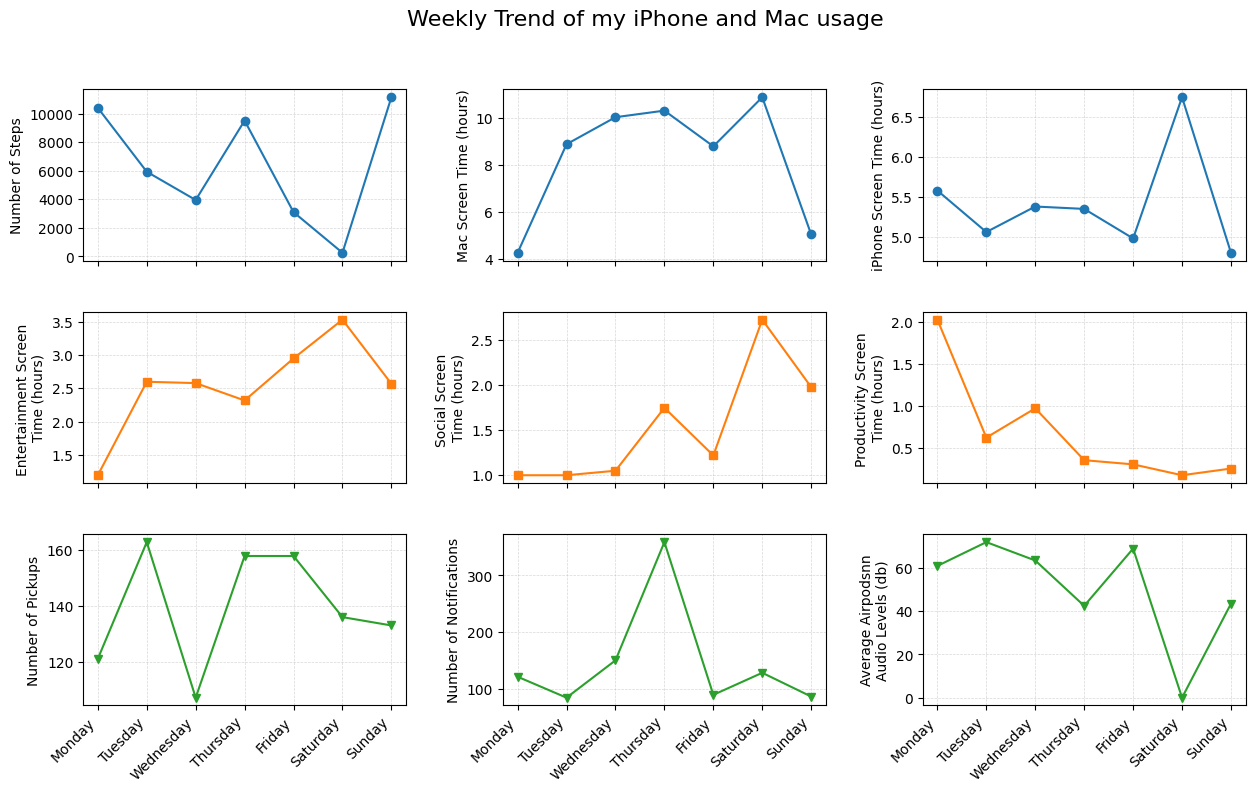

In [148]:
df_weekly = df.copy()
df_weekly['day'] = pd.Categorical(df_weekly['day'], ordered=True)

# Initialize the figure
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
# Create the individual subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharex=ax1)
ax4 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax5 = fig.add_subplot(gs[1, 1], sharex=ax1)
ax6 = fig.add_subplot(gs[1, 2], sharex=ax1)
ax7 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax8 = fig.add_subplot(gs[2, 1], sharex=ax1)
ax9 = fig.add_subplot(gs[2, 2], sharex=ax1)

# Define a color palette
palette = plt.get_cmap('tab10')

# Plotting
ax1.plot(df_weekly['day'], df_weekly['num_steps'], marker='o', linestyle='-', color=palette(0))
ax1.set_ylabel("Number of Steps")

ax2.plot(df_weekly['day'], df_weekly['mac_screentime'], marker='o', linestyle='-', color=palette(0))
ax2.set_ylabel("Mac Screen Time (hours)")

ax3.plot(df_weekly['day'], df_weekly['phone_screentime'], marker='o', linestyle='-', color=palette(0))
ax3.set_ylabel("iPhone Screen Time (hours)")

ax4.plot(df_weekly['day'], df_weekly['entertainment'], marker='s', linestyle='-', color=palette(1))
ax4.set_ylabel("Entertainment Screen \nTime (hours)")

ax5.plot(df_weekly['day'], df_weekly['social'], marker='s', linestyle='-', color=palette(1))
ax5.set_ylabel("Social Screen \nTime (hours)")

ax6.plot(df_weekly['day'], df_weekly['productivity'], marker='s', linestyle='-', color=palette(1))
ax6.set_ylabel("Productivity Screen \nTime (hours)")

ax7.plot(df_weekly['day'], df_weekly['num_pickups'], marker='v', linestyle='-', color=palette(2))
ax7.set_ylabel("Number of Pickups")

ax8.plot(df_weekly['day'], df_weekly['notifications'], marker='v', linestyle='-', color=palette(2))
ax8.set_ylabel("Number of Notifications")

ax9.plot(df_weekly['day'], df_weekly['average_audio_levels'], marker='v', linestyle='-', color=palette(2))
ax9.set_ylabel("Average Airpodsnn\nAudio Levels (db)")
# Title
fig.suptitle("Weekly Trend of my iPhone and Mac usage", fontsize=16)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)  # This hides the x-axis labels
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)


for ax in [ax7, ax8, ax9]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

fig.suptitle("Weekly Trend of my iPhone and Mac usage", fontsize=16)
plt.tight_layout()
plt.show()

#### Mac vs iPhone screen time out of 24 hours

In [170]:
# Create a column to record my iPhone and Mac screen time out of 24 hours (percentage)
df_stacked = df.copy()
df_stacked['phone_screentime_percentage'] = round((df['phone_screentime']/24) * 100, 2) 
df_stacked['mac_screentime_percentage'] = round((df['mac_screentime']/24) * 100, 2) 

In [171]:
df_stacked

,day,num_steps,average_audio_levels,phone_screentime,entertainment,social,productivity,num_pickups,notifications,mac_screentime,phone_screentime_percentage,mac_screentime_percentage
0,Monday,10407,61.0,5.58,1.20,1.00,2.03,121,121,4.25,23.25,17.71
1,Tuesday,5933,72.0,5.06,2.60,1.00,0.62,163,84,8.87,21.08,36.96
2,Wednesday,3954,63.5,5.38,2.58,1.05,0.97,107,150,10.02,22.42,41.75
3,Thursday,9514,42.5,5.35,2.32,1.75,0.35,158,359,10.30,22.29,42.92
4,Friday,3105,69.0,4.98,2.95,1.22,0.30,158,89,8.78,20.75,36.58
5,Saturday,258,0.0,6.75,3.53,2.73,0.17,136,128,10.87,28.12,45.29
6,Sunday,11150,43.5,4.80,2.57,1.98,0.25,133,86,5.03,20.00,20.96


In [173]:
df_stacked = df_stacked[['day', 'phone_screentime', 'mac_screentime', 'phone_screentime_percentage', 'mac_screentime_percentage']]
df_stacked

,day,phone_screentime,mac_screentime,phone_screentime_percentage,mac_screentime_percentage
0,Monday,5.58,4.25,23.25,17.71
1,Tuesday,5.06,8.87,21.08,36.96
2,Wednesday,5.38,10.02,22.42,41.75
3,Thursday,5.35,10.30,22.29,42.92
4,Friday,4.98,8.78,20.75,36.58
5,Saturday,6.75,10.87,28.12,45.29
6,Sunday,4.80,5.03,20.00,20.96


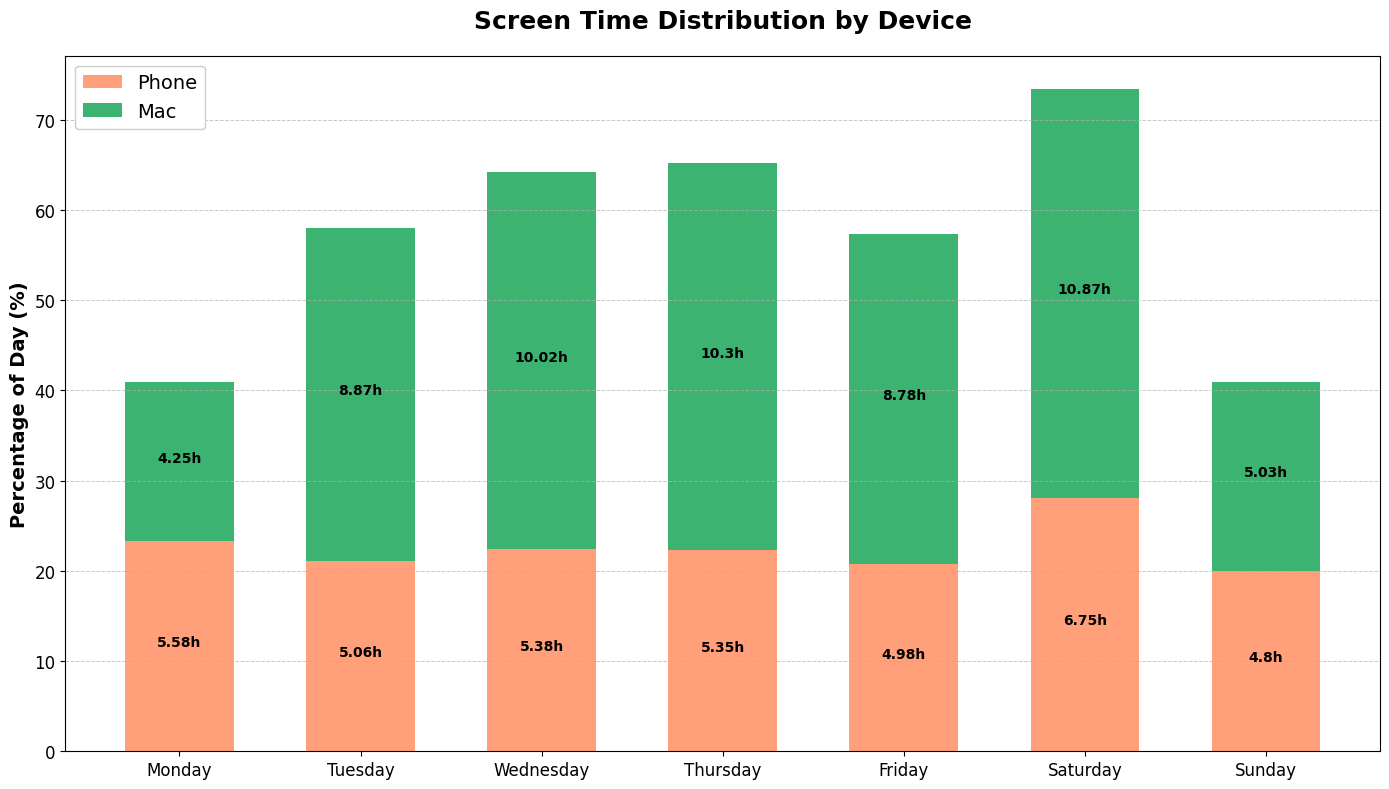

In [189]:
# Stacked bar plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define a harmonious color palette
colors = ['#FFA07A', '#3CB371']

# Stacked bar chart
bars1 = ax.bar(df_stacked['day'], df_stacked['phone_screentime_percentage'], label='Phone', color=colors[0], width=0.6)
bars2 = ax.bar(df_stacked['day'], df_stacked['mac_screentime_percentage'], bottom=df_stacked['phone_screentime_percentage'], label='Mac', color=colors[1], width=0.6)

# Adding labels inside the bars
for bar, phone_time in zip(bars1, df_stacked['phone_screentime']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, str(phone_time) + 'h', ha='center', color='black', fontsize=10, fontweight='bold')

for bar, mac_time, phone_percentage in zip(bars2, df_stacked['mac_screentime'], df_stacked['phone_screentime_percentage']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + phone_percentage, str(mac_time) + 'h', ha='center', color='black', fontsize=10, fontweight='bold')

# Setting the y-axis label and title
ax.set_ylabel('Percentage of Day (%)', fontsize=14, fontweight='bold')
ax.set_title('Screen Time Distribution by Device', fontsize=18, fontweight='bold', pad=20)

# Gridlines and legend
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.legend(loc='upper left', fontsize=14, frameon=True, framealpha=1)

# Adjusting the ticks' fontsize
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()